# statistical analysis

  
reference:  
https://www.kaggle.com/mjbahmani/statistical-analysis-for-elo  
https://www.kaggle.com/c/elo-merchant-category-recommendation/discussion/82055  
https://www.kaggle.com/chauhuynh/my-first-kernel-3-699  
https://www.kaggle.com/fabiendaniel/elo-world

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
print(os.listdir("../data"))

['Data_Dictionary.xlsx', 'new_merchant_transactions.csv', 'test.csv', 'merchants.csv', 'historical_transactions.csv', 'train.csv', '.ipynb_checkpoints', 'sample_submission.csv']


### load data

In [2]:
train_raw = pd.read_csv('../data/train.csv')
test_raw = pd.read_csv('../data/test.csv')
merchants_raw = pd.read_csv('../data/merchants.csv')
historical_transactions_raw = pd.read_csv('../data/historical_transactions.csv')
new_transactions_raw = pd.read_csv('../data/new_merchant_transactions.csv')
# sample_submission = pd.read_csv('../data/sample_submission.csv')
print('...loaded')

...loaded


In [4]:
# assign to new dataframe, save the raw data to be able to reuse again
train = train_raw
train.name = 'train data'
test = test_raw
test.name = 'test data'
historical_transactions = historical_transactions_raw
historical_transactions.name = 'historical transaction data'
new_transactions = new_transactions_raw
new_transactions.name = 'new transaction data'
merchants = merchants_raw
merchants.name = 'merchants data'

### describe data

In [5]:
train.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749


In [6]:
test.head()

,first_active_month,card_id,feature_1,feature_2,feature_3
0,2017-04,C_ID_0ab67a22ab,3,3,1
1,2017-01,C_ID_130fd0cbdd,2,3,0
2,2017-08,C_ID_b709037bc5,5,1,1
3,2017-12,C_ID_d27d835a9f,2,1,0
4,2015-12,C_ID_2b5e3df5c2,5,1,1


In [7]:
merchants.head()

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057471,-0.057471,N,E,E,-0.40,...,-2.25,18.666667,6,-2.32,13.916667,12,N,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057471,-0.057471,N,E,E,-0.72,...,-0.74,1.291667,6,-0.57,1.687500,12,N,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057471,-0.057471,N,E,E,-82.13,...,-82.13,260.000000,2,-82.13,260.000000,2,N,-1,5,5.0
3,M_ID_a70e9c5f81,5026,792,9,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,4.666667,6,NaN,3.833333,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,0.361111,6,NaN,0.347222,12,Y,-1,-1,NaN


In [8]:
historical_transactions.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


In [9]:
new_transactions.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.557574,2018-03-11 14:57:36,1.0,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.569580,2018-03-19 18:53:37,1.0,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551037,2018-04-26 14:08:44,1.0,9,14
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,-0.671925,2018-03-07 09:43:21,NaN,-1,8
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.659904,2018-03-22 21:07:53,NaN,-1,29


## historical transactions

In [15]:
hist_tran = historical_transactions_raw

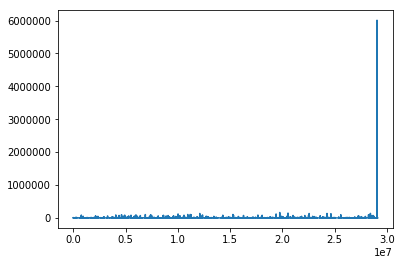

In [16]:
# plot the purchase_amount
fig=plt.figure()
plt.plot(range(0, hist_tran.shape[0]), hist_tran['purchase_amount'])

In [18]:
# an weird puchase amount
# which is a really large amount purchase
hist_tran[hist_tran['purchase_amount'] > 1000000]

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
29050360,N,C_ID_3b6ac8e52d,69,N,0,A,683,M_ID_ee49262ab5,-3,6.010604e+06,2017-04-23 06:58:58,1.0,9,34


In [31]:
# get the time feature with yyyy-mm-dd
hist_dropped['purchase_date'] = pd.to_datetime(hist_dropped['purchase_date'])
hist_dropped['time'] = hist_dropped['purchase_date'].dt.date

# get the average 
hist_agg = hist_dropped.groupby('time', as_index=False)['purchase_amount'].mean()

In [26]:
train_agg = train.groupby('first_active_month', as_index=False)['card_id'].agg('count')

In [27]:
train_agg.head()

,first_active_month,card_id
0,2011-11,8
1,2011-12,2
2,2012-02,7
3,2012-03,10
4,2012-04,18


In [29]:
train['first_active_month'] = pd.to_datetime(train['first_active_month'])
train['weekofyear'] = train['first_active_month'].dt.weekofyear
train['month'] = train['first_active_month'].dt.month

Text(0.5, 0, 'week of year')

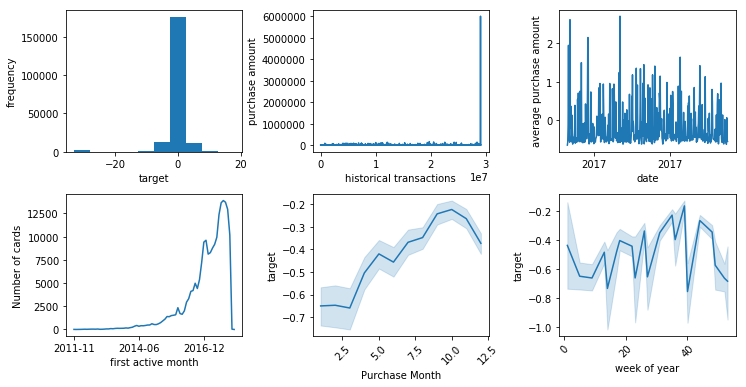

In [46]:
# plot
plt.figure(figsize=(12,6))
plt.subplots_adjust(wspace=0.4, hspace=0.3)

plt.subplot(231)
plt.hist(train['target'])
plt.xlabel('target')
plt.ylabel('frequency')

plt.subplot(232)
plt.plot(range(0, hist_tran.shape[0]), hist_tran['purchase_amount'])
plt.xlabel('historical transactions')
plt.ylabel('purchase amount')

ax = plt.subplot(233)
plt.plot(hist_agg['time'], hist_agg['purchase_amount'])
ax.xaxis.set_major_locator(plt.MaxNLocator(3))
plt.xlabel('date')
plt.ylabel('average purchase amount')

ax = plt.subplot(234)
plt.plot(train_agg['first_active_month'], train_agg['card_id'])
ax.xaxis.set_major_locator(plt.MaxNLocator(3))
plt.xlabel('first active month')
plt.ylabel('Number of cards')

plt.subplot(235)
ax = sns.lineplot(x = "month", y = "target", 
                  markers = True, dashes = False, data = train)
plt.xticks(rotation = 45)
ax.set_xlabel('Purchase Month')
plt.subplot(236)
ax = sns.lineplot(x = "weekofyear", y = "target", 
                  markers = True, dashes = False, data = train)
plt.xticks(rotation = 45)
ax.set_xlabel('week of year')

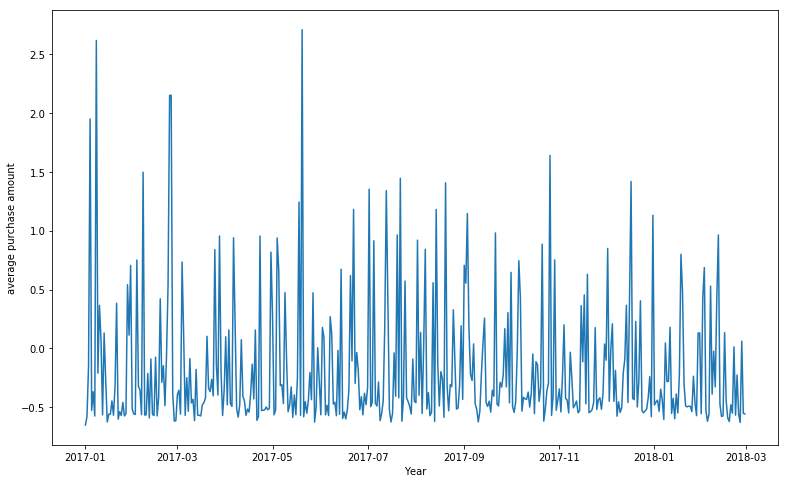

In [25]:
fig=plt.figure(figsize=(13, 8))
plt.plot(hist_agg['time'], hist_agg['purchase_amount'])
plt.xlabel('Year')
plt.ylabel('average purchase amount')
plt.show()

In [145]:
# index date
hist_agg['time_id'] = pd.to_datetime(hist_agg['time'])
hist_agg.set_index('time_id', inplace=True)

In [146]:
hist_agg.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 424 entries, 2017-01-01 to 2018-02-28
Data columns (total 2 columns):
time               424 non-null object
purchase_amount    424 non-null float64
dtypes: float64(1), object(1)
memory usage: 9.9+ KB


In [147]:
hist_by_month = hist_agg.loc["2017-01-01":"2017-03-01"]

In [148]:
hist_by_month.head()

,time,purchase_amount
time_id,,
2017-01-01,2017-01-01,-0.650417
2017-01-02,2017-01-02,-0.578748
2017-01-03,2017-01-03,-0.153046
2017-01-04,2017-01-04,1.947438
2017-01-05,2017-01-05,-0.526279


Text(0, 0.5, 'average purchase amount')

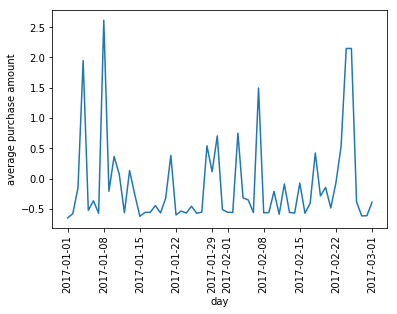

In [152]:
fig=plt.figure()
plt.plot(hist_by_month['time'], hist_by_month['purchase_amount'])
plt.xticks(rotation=90)
plt.xlabel('day')
plt.ylabel('average purchase amount')
# savepdf(fig,'yearly_c02_regridded')

### time series

In [193]:
hist_agg['time'] = pd.to_datetime(hist_agg['time'])
times =  pd.to_numeric(hist_agg['time'])

hist_fft=np.fft.fft(hist_agg['purchase_amount'])
freqs = np.fft.fftfreq(hist_agg.shape[0], times[1]- times[0])

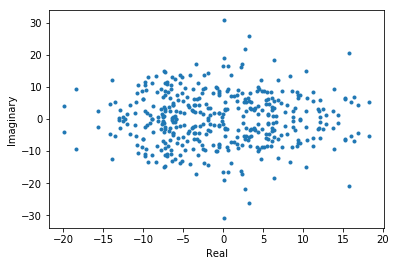

In [194]:
fig=plt.figure()
plt.plot(np.real(hist_fft[1:]),np.imag(hist_fft[1:]),'.')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.show()

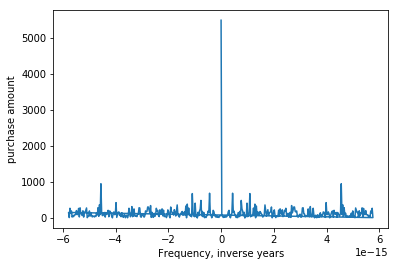

In [195]:
fig=plt.figure()
plt.plot(freqs,np.abs(hist_fft)**2)
plt.xlabel('Frequency, inverse years')
plt.ylabel('purchase amount')
plt.show()

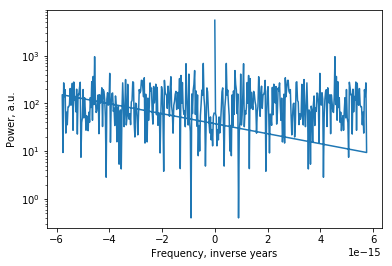

In [196]:
fig=plt.figure()
plt.semilogy(freqs,np.abs(hist_fft)**2)
plt.xlabel('Frequency, inverse years')
plt.ylabel('Power, a.u.')
plt.show()

### new transactions

In [ ]:
new_transactions.head()

In [ ]:
train.info()
print('\n')
test.info()
print('\n')
merchants.info()
print('\n')
historical_transactions.info()
print('\n')
new_transactions.info()

### data dictionary

In [89]:
data_dictionary_train=pd.read_excel('../data/Data_Dictionary.xlsx',sheet_name='train')
data_dictionary_history=pd.read_excel('../data/Data_Dictionary.xlsx',sheet_name='history')
data_dictionary_new_merchant_period=pd.read_excel('../data/Data_Dictionary.xlsx',sheet_name='new_merchant_period')
data_dictionary_merchant=pd.read_excel('../data/Data_Dictionary.xlsx',sheet_name='merchant')

In [204]:
data_dictionary_train

,train.csv,Unnamed: 1
0,NaN,NaN
1,Columns,Description
2,card_id,Unique card identifier
3,first_active_month,"'YYYY-MM', month of first purchase"
4,feature_1,Anonymized card categorical feature
5,feature_2,Anonymized card categorical feature
6,feature_3,Anonymized card categorical feature
7,target,Loyalty numerical score calculated 2 months af...


In [91]:
data_dictionary_history

,historical_transactions.csv,Unnamed: 1
0,NaN,NaN
1,Columns,Description
2,card_id,Card identifier
3,month_lag,month lag to reference date
4,purchase_date,Purchase date
5,authorized_flag,"Y' if approved, 'N' if denied"
6,category_3,anonymized category
7,installments,number of installments of purchase
8,category_1,anonymized category
9,merchant_category_id,Merchant category identifier (anonymized )


In [205]:
data_dictionary_merchant

,merchants.csv,Unnamed: 1
0,NaN,NaN
1,Columns,Description
2,merchant_id,Unique merchant identifier
3,merchant_group_id,Merchant group (anonymized )
4,merchant_category_id,Unique identifier for merchant category (anony...
5,subsector_id,Merchant category group (anonymized )
6,numerical_1,anonymized measure
7,numerical_2,anonymized measure
8,category_1,anonymized category
9,most_recent_sales_range,Range of revenue (monetary units) in last acti...


In [ ]:
train.hist(figsize=(10,10))

In [ ]:
plt.subplot(1, 4, 1)
plt.hist(train['target'])
plt.hist(train['feature_1'])
plt.hist(train['feature_2'])
plt.hist(train['feature_3'])

In [ ]:
test.hist(figsize=(10,10))
plt.show()

In [ ]:
plt.hist(historical_transactions['purchase_amount'])

In [ ]:
# historical_transactions.groupby('purchase_date')

In [ ]:
plt.hist(new_transactions['purchase_date'])

In [ ]:
target = train['target']

In [ ]:
ax = sns.lineplot(x = "purchase_date", y = "target", 
                  markers = True, dashes = False, data = historical_transactions)
plt.xticks(rotation = 45)
ax.set_title('Target Variable Changes over Purchase Month')
ax.set_xlabel('Purchase Month')

In [ ]:
new_transactions.hist(figsize=(7,7))
plt.show()